![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

None
<<______HEAD______>>
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 20

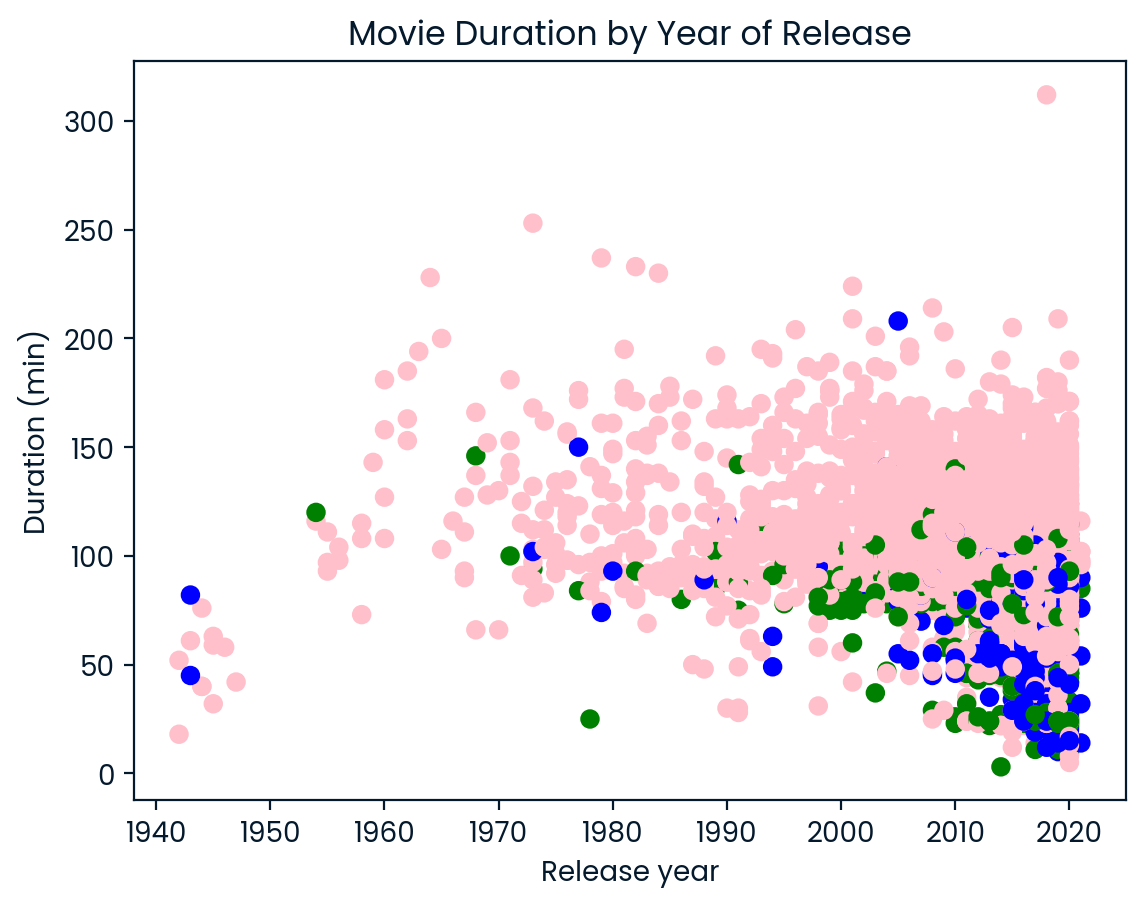

                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     235.5
Date:                Sat, 04 May 2024   Prob (F-statistic):           4.65e-52
Time:                        16:39:19   Log-Likelihood:                -25532.
No. Observations:                5377   AIC:                         5.107e+04
Df Residuals:                    5375   BIC:                         5.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1317.0050     79.345     16.598   

In [11]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Importing the data
netflix_df = pd.read_csv("netflix_data.csv")

# function
def explore_df(df, method):
    if method.lower() == "desc":
        print(df.describe())
    elif method.lower() == "head":
        pd.set_option('display.max_columns', None)
        print(df.head())
        pd.reset_option('display.max_columns')
    elif method.lower() == "info":
        print(df.info())
    elif method.lower() == "all":
        print("<<______HEAD______>>")
        pd.set_option('display.max_columns', None)
        print(df.head())
        pd.reset_option('display.max_columns')
        print(f"\n\n<<______DESCRIBE______>>")
        print(df.describe())
        print(f"\n\n<<______INFO______>>")
        print(df.info())
    else:
        print("Methods: 'desc', 'head', 'info' or 'all'")

# Test documentation
print(explore_df.__doc__)

# data
explore_df(netflix_df, "all")

# Tasks:

# (1) Filter the data to remove TV shows and store as netflix_subset.
netflix_subset = netflix_df[~(netflix_df['type'] == "TV Show")]

# sanity check (1)
print(netflix_subset["type"].unique())


# (2) Investigate the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies.
col_to_keep = ["title", "country", "genre", "release_year", "duration"]
netflix_movies = netflix_subset[col_to_keep]

# sanity check
explore_df(netflix_movies, "info")


# (3.1) Filter netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as short_movies; 
less_than_60 = netflix_movies["duration"] < 60
short_movies = netflix_movies[less_than_60]

# sanity check 
explore_df(short_movies["duration"], "desc")

# (3.2) Inspect the result to find possible contributing factors.

# inspect whether a specific genre pulls the mean down
short_movies.groupby("genre")["duration"].mean().sort_values()
# Dramas, Horror and Children's movies have the lowest duration

# inspect whether a specific country pulls the mean down
short_movies.groupby("country")["duration"].mean().sort_values()
# Pakistan (16), Georgia (24) and Namibia (29) have particularly low means


# (4.1) Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list.
colors = []
for index, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('green')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-up':
        colors.append('yellow')
    else:
        colors.append('pink')
        
# sanity check
len(colors) == netflix_movies.shape[0]

# (4.2) Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".
x = netflix_movies["release_year"]
y = netflix_movies["duration"]
fig = plt.figure()
plt.scatter(x, y, c=colors)
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release")
plt.show()


# (5) After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes" or "no" to the variable answer.
answer = "no"


# (Bonus) Answer the question in a statistical way.
# Note: not part of Datacamp exercise but an easy concise way to answer the question in a statistical way.
import statsmodels.api as sm
x = netflix_movies["release_year"]
y = netflix_movies["duration"]

# add intercept + fit OLS linear regression
x = sm.add_constant(x)
lr = sm.OLS(y, x).fit()

# print summary
print(lr.summary())